In [1]:
import sys
import os
import re
import numpy
#import csv
#import cPickle as pickle
#import itertools
import logging
from collections import Counter, defaultdict, OrderedDict
import IPython
from IPython.display import display, Markdown, HTML
def mprint(s):
    "A convenience to format things in Jupyter notebooks via MarkDown syntax"
    display(Markdown(s))

# Add $RMGpy to front of your $PYTHONPATH in case you didn't already
sys.path.insert(1,os.getenv('RMGpy',os.path.expanduser('~/Code/RMG-Py')))
from rmgpy.molecule import Molecule, Atom, Bond
#import rmgpy.kinetics
#from rmgpy.data.rmg import RMGDatabase
#from rmgpy.data.kinetics.library import KineticsLibrary

In [2]:
m = Molecule(SMILES="CC")
display(m)
m

In [3]:
from_github="""H	X-H
H2	X:H2
H2O	X:OH2
OHl	X-OH
HO-OHl	X:OH-OH
O2	X-O-O-X
OOH	X-O-OH
O	X=O
O-NH2	X-O-NH2
O-CH3	X-O-CH3
NH3	X:NH3
NH2	X-NH2
NH	X=NH
N	X#N
H2N-OH	X:NH2-OH
HN-O	X:NH=O
HN-OH	X-NH-OH
NO	X-N=O
NOH	X=N-OH
HNO-h	X-NH-O-X
NO-h	X=N-O-X
H2N-NH2	X:NH2-NH2
HN-NH	X:NH-NH
NN	X-N=N-X
HN-NH2	X-NH-NH2
N-NH	X-N=NH
N-NH2	X=N-NH2l
HN-NH-h	X-NH-NH-X
HN-N-h	X-NH-N=X
HN-CH3	X-NH-CH3
N-CH2	X-N=CH2
N-CH3	X=N-CH3
ON-O	X-NO=O
C	X#C
C-C	X=C=C=X
C-CH2	X=C=CH2
C-CH3	X#C-CH3
CH	X#C-H
CH-CH	X=CH-CH=X
CH-CH-vdw	X:CH#CH
CH2	X=CH2
CH2-CH2	X-CH2-CH2-X
CH3	X-CH3
CH3-CH3	X:CH3-CH3
CH4	X:CH4
CN	X=C=N-X
CNH	X=C=NH
CNH2	X#C-NH2
CO-f	X=C=O
COH	X#C-OH
H2C-CH	X-CH2-CH=X
H2C-CH3	X-CH2-CH3
H2C-NH	X:CH2=NH
H2C-NH2	X-CH2-NH2
H2C-O	X:CH2=O
H2C-OH	X-CH2-OH
H2CN-h	X-CH2-N=X
H2CNH-h	X-CH2-NH-X
H3C-NH2	X:CH3-NH2
H3C-OH	X:CH3-OH
HC-C	X-CH=C=X
HC-CH2	X-CH=CH2
HC-CH3	X=CH-CH3
HCN	X:CH#N
HCN-h	X=CH-N=X
HCNH	X-CH=NH
HCNH-h	X=CH-NH-X
HCNH2	X=CH-NH2
HCO	X-CH=O
HCO-h	X=CH-O-X
HCOH	X=CH-OH
"""

names_to_structure = {}
for line in from_github.splitlines():
    name, structure = line.split()
    names_to_structure[name] = structure
names_to_structure

{'C': 'X#C',
 'C-C': 'X=C=C=X',
 'C-CH2': 'X=C=CH2',
 'C-CH3': 'X#C-CH3',
 'CH': 'X#C-H',
 'CH-CH': 'X=CH-CH=X',
 'CH-CH-vdw': 'X:CH#CH',
 'CH2': 'X=CH2',
 'CH2-CH2': 'X-CH2-CH2-X',
 'CH3': 'X-CH3',
 'CH3-CH3': 'X:CH3-CH3',
 'CH4': 'X:CH4',
 'CN': 'X=C=N-X',
 'CNH': 'X=C=NH',
 'CNH2': 'X#C-NH2',
 'CO-f': 'X=C=O',
 'COH': 'X#C-OH',
 'H': 'X-H',
 'H2': 'X:H2',
 'H2C-CH': 'X-CH2-CH=X',
 'H2C-CH3': 'X-CH2-CH3',
 'H2C-NH': 'X:CH2=NH',
 'H2C-NH2': 'X-CH2-NH2',
 'H2C-O': 'X:CH2=O',
 'H2C-OH': 'X-CH2-OH',
 'H2CN-h': 'X-CH2-N=X',
 'H2CNH-h': 'X-CH2-NH-X',
 'H2N-NH2': 'X:NH2-NH2',
 'H2N-OH': 'X:NH2-OH',
 'H2O': 'X:OH2',
 'H3C-NH2': 'X:CH3-NH2',
 'H3C-OH': 'X:CH3-OH',
 'HC-C': 'X-CH=C=X',
 'HC-CH2': 'X-CH=CH2',
 'HC-CH3': 'X=CH-CH3',
 'HCN': 'X:CH#N',
 'HCN-h': 'X=CH-N=X',
 'HCNH': 'X-CH=NH',
 'HCNH-h': 'X=CH-NH-X',
 'HCNH2': 'X=CH-NH2',
 'HCO': 'X-CH=O',
 'HCO-h': 'X=CH-O-X',
 'HCOH': 'X=CH-OH',
 'HN-CH3': 'X-NH-CH3',
 'HN-N-h': 'X-NH-N=X',
 'HN-NH': 'X:NH-NH',
 'HN-NH-h': 'X-NH-NH-X',
 'HN-NH2'

OHl
X-OH
1 X u0 p0 c0 {2,S}
2 O u0 p2 c0 {1,S} {3,S}
3 H u0 p0 c0 {2,S}



--------------------
HN-N-h
X-NH-N=X
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u0 p1 c0 {2,S} {5,D}
5 X u0 p0 c0 {4,D}



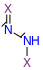

--------------------
H2C-O
X:CH2=O
1 X u0 p0 c0
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {2,D}



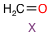

--------------------
CH-CH
X=CH-CH=X
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 C u0 p1 c0 {2,S} {5,S} {6,D}
5 H u0 p0 c0 {4,S}
6 X u0 p0 c0 {4,D}



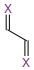

ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 34, in <module>
    group_mol = Molecule(SMILES='[{}]'.format(group_atoms))
  File "rmgpy/molecule/molecule.py", line 715, in rmgpy.molecule.molecule.Molecule.__init__
    if SMILES != '': self.fromSMILES(SMILES)
  File "rmgpy/molecule/molecule.py", line 1395, in rmgpy.molecule.molecule.Molecule.fromSMILES
    parser.fromSMILES(self, smilesstr, backend)
  File "rmgpy/molecule/parser.py", line 346, in rmgpy.molecule.parser.fromSMILES
    def fromSMILES(mol, smilesstr, backend='try-all'):
  File "rmgpy/molecule/parser.py", line 352, in rmgpy.molecule.parser.fromSMILES
    return __parse(mol, smilesstr, 'smi', backend)
  File "rmgpy/molecule/parser.py", line 157, in rmgpy.molecule.parser.__parse
    __fromSMILES(mol, identifier, _backend)
  File "rmgpy/molecule/parser.py", line 104, in rmgpy.molecule.parser.__fromSMILES
    raise ValueError("Could not interpret the SMILES string {0!r}".forma

--------------------
ON-O
X-NO=O
--------------------
HCO-h
X=CH-O-X
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 O u0 p2 c0 {2,S} {5,S}
5 X u0 p0 c0 {4,S}



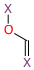

--------------------
HN-OH
X-NH-OH
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 O u0 p2 c0 {2,S} {5,S}
5 H u0 p0 c0 {4,S}



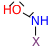

--------------------
H2C-OH
X-CH2-OH
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {2,S} {6,S}
6 H u0 p0 c0 {5,S}



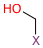

--------------------
H2C-NH2
X-CH2-NH2
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 N u0 p1 c0 {2,S} {6,S} {7,S}
6 H u0 p0 c0 {5,S}
7 H u0 p0 c0 {5,S}



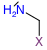

--------------------
CH3
X-CH3
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}



--------------------
HC-CH3
X=CH-CH3
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 C u0 p0 c0 {2,S} {5,S} {6,S} {7,S}
5 H u0 p0 c0 {4,S}
6 H u0 p0 c0 {4,S}
7 H u0 p0 c0 {4,S}



--------------------
HCNH-h
X=CH-NH-X
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u0 p1 c0 {2,S} {5,S} {6,S}
5 H u0 p0 c0 {4,S}
6 X u0 p0 c0 {4,S}



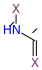

--------------------
COH
X#C-OH
1 X u0 p0 c0 {2,T}
2 C u0 p1 c0 {1,T} {3,S}
3 O u0 p2 c0 {2,S} {4,S}
4 H u0 p0 c0 {3,S}



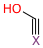

--------------------
CH2-CH2
X-CH2-CH2-X
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 C u0 p0 c0 {2,S} {6,S} {7,S} {8,S}
6 H u0 p0 c0 {5,S}
7 H u0 p0 c0 {5,S}
8 X u0 p0 c0 {5,S}



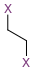

--------------------
O2
X-O-O-X
1 X u0 p0 c0 {2,S}
2 O u0 p2 c0 {1,S} {3,S}
3 O u0 p2 c0 {2,S} {4,S}
4 X u0 p0 c0 {3,S}



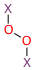

--------------------
NH
X=NH
1 X u0 p0 c0 {2,D}
2 N u0 p1 c0 {1,D} {3,S}
3 H u0 p0 c0 {2,S}



--------------------
H2CNH-h
X-CH2-NH-X
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 N u0 p1 c0 {2,S} {6,S} {7,S}
6 H u0 p0 c0 {5,S}
7 X u0 p0 c0 {5,S}



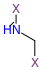

--------------------
H3C-OH
X:CH3-OH
1 X u0 p0 c0
2 C u0 p0 c0 {3,S} {4,S} {5,S} {6,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}
6 O u0 p2 c0 {2,S} {7,S}
7 H u0 p0 c0 {6,S}



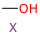

--------------------
H2N-OH
X:NH2-OH
1 X u0 p0 c0
2 N u0 p1 c0 {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 O u0 p2 c0 {2,S} {6,S}
6 H u0 p0 c0 {5,S}



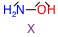

--------------------
NO
X-N=O
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,D}
3 O u0 p2 c0 {2,D}



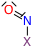

--------------------
H2C-CH
X-CH2-CH=X
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 C u0 p1 c0 {2,S} {6,S} {7,D}
6 H u0 p0 c0 {5,S}
7 X u0 p0 c0 {5,D}



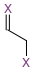

ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".


--------------------
C-C
X=C=C=X
--------------------
HO-OHl
X:OH-OH
1 X u0 p0 c0
2 O u0 p2 c0 {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 O u0 p2 c0 {2,S} {5,S}
5 H u0 p0 c0 {4,S}



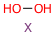

--------------------
N-NH
X-N=NH
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,D}
3 N u0 p1 c0 {2,D} {4,S}
4 H u0 p0 c0 {3,S}



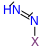

--------------------
HCNH2
X=CH-NH2
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u0 p1 c0 {2,S} {5,S} {6,S}
5 H u0 p0 c0 {4,S}
6 H u0 p0 c0 {4,S}



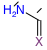

--------------------
CH2
X=CH2
1 X u0 p0 c0 {2,D}
2 C u0 p0 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}



--------------------
HNO-h
X-NH-O-X
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 O u0 p2 c0 {2,S} {5,S}
5 X u0 p0 c0 {4,S}



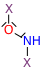

--------------------
CH4
X:CH4
1 X u0 p0 c0
2 C u0 p0 c0 {3,S} {4,S} {5,S} {6,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}
6 H u0 p0 c0 {2,S}



--------------------
O-CH3
X-O-CH3
1 X u0 p0 c0 {2,S}
2 O u0 p2 c0 {1,S} {3,S}
3 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}
6 H u0 p0 c0 {3,S}



--------------------
HN-NH2
X-NH-NH2
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u0 p1 c0 {2,S} {5,S} {6,S}
5 H u0 p0 c0 {4,S}
6 H u0 p0 c0 {4,S}



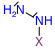

ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".


--------------------
CO-f
X=C=O
--------------------
N-NH2
X=N-NH2l
1 X u0 p0 c0 {2,D}
2 N u0 p1 c0 {1,D} {3,S}
3 N u0 p1 c0 {2,S} {4,S} {5,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}



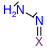

--------------------
HCN-h
X=CH-N=X
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u0 p1 c0 {2,S} {5,D}
5 X u0 p0 c0 {4,D}



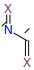

--------------------
H2C-CH3
X-CH2-CH3
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 C u0 p0 c0 {2,S} {6,S} {7,S} {8,S}
6 H u0 p0 c0 {5,S}
7 H u0 p0 c0 {5,S}
8 H u0 p0 c0 {5,S}



--------------------
C
X#C
multiplicity 2
1 X u0 p0 c0 {2,T}
2 C u1 p1 c0 {1,T}



--------------------
CH
X#C-H
1 X u0 p0 c0 {2,T}
2 C u0 p1 c0 {1,T} {3,S}
3 H u0 p0 c0 {2,S}



--------------------
HN-NH
X:NH-NH
multiplicity 3
1 X u0 p0 c0
2 N u1 p1 c0 {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u1 p1 c0 {2,S} {5,S}
5 H u0 p0 c0 {4,S}



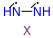

ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".


--------------------
CN
X=C=N-X
--------------------
HN-O
X:NH=O
1 X u0 p0 c0
2 N u0 p1 c0 {3,S} {4,D}
3 H u0 p0 c0 {2,S}
4 O u0 p2 c0 {2,D}



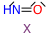

--------------------
CH3-CH3
X:CH3-CH3
1 X u0 p0 c0
2 C u0 p0 c0 {3,S} {4,S} {5,S} {6,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}
6 C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
7 H u0 p0 c0 {6,S}
8 H u0 p0 c0 {6,S}
9 H u0 p0 c0 {6,S}



--------------------
H
X-H
1 X u0 p0 c0 {2,S}
2 H u0 p0 c0 {1,S}



--------------------
HCOH
X=CH-OH
1 X u0 p0 c0 {2,D}
2 C u0 p1 c0 {1,D} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 O u0 p2 c0 {2,S} {5,S}
5 H u0 p0 c0 {4,S}



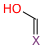

--------------------
O
X=O
1 X u0 p0 c0 {2,D}
2 O u0 p2 c0 {1,D}



--------------------
N
X#N
1 X u0 p0 c0 {2,T}
2 N u0 p1 c0 {1,T}



--------------------
CH-CH-vdw
X:CH#CH
1 X u0 p0 c0
2 C u0 p1 c0 {3,S} {4,T}
3 H u0 p0 c0 {2,S}
4 C u0 p1 c0 {2,T} {5,S}
5 H u0 p0 c0 {4,S}



--------------------
O-NH2
X-O-NH2
1 X u0 p0 c0 {2,S}
2 O u0 p2 c0 {1,S} {3,S}
3 N u0 p1 c0 {2,S} {4,S} {5,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}



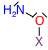

--------------------
HN-CH3
X-NH-CH3
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 C u0 p0 c0 {2,S} {5,S} {6,S} {7,S}
5 H u0 p0 c0 {4,S}
6 H u0 p0 c0 {4,S}
7 H u0 p0 c0 {4,S}



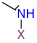

--------------------

ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".



HCN
X:CH#N
--------------------
H2C-NH
X:CH2=NH
1 X u0 p0 c0
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 N u0 p1 c0 {2,D} {6,S}
6 H u0 p0 c0 {5,S}



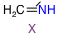

--------------------
NH3
X:NH3
1 X u0 p0 c0
2 N u0 p1 c0 {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}



--------------------
NH2
X-NH2
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}



--------------------
H3C-NH2
X:CH3-NH2
1 X u0 p0 c0
2 C u0 p0 c0 {3,S} {4,S} {5,S} {6,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}
6 N u0 p1 c0 {2,S} {7,S} {8,S}
7 H u0 p0 c0 {6,S}
8 H u0 p0 c0 {6,S}



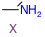

--------------------
H2N-NH2
X:NH2-NH2
1 X u0 p0 c0
2 N u0 p1 c0 {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 N u0 p1 c0 {2,S} {6,S} {7,S}
6 H u0 p0 c0 {5,S}
7 H u0 p0 c0 {5,S}



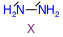

--------------------
HCO
X-CH=O


ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".
ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.Act

--------------------
CNH
X=C=NH
--------------------
HN-NH-h
X-NH-NH-X
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 N u0 p1 c0 {2,S} {5,S} {6,S}
5 H u0 p0 c0 {4,S}
6 X u0 p0 c0 {4,S}



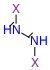

--------------------
CNH2
X#C-NH2
1 X u0 p0 c0 {2,T}
2 C u0 p1 c0 {1,T} {3,S}
3 N u0 p1 c0 {2,S} {4,S} {5,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}



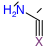

--------------------
NOH
X=N-OH
1 X u0 p0 c0 {2,D}
2 N u0 p1 c0 {1,D} {3,S}
3 O u0 p2 c0 {2,S} {4,S}
4 H u0 p0 c0 {3,S}



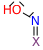

--------------------
NN
X-N=N-X
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,D}
3 N u0 p1 c0 {2,D} {4,S}
4 X u0 p0 c0 {3,S}



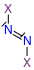

ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".
ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 34, in <module>
    group_mol = Molecule(SMILES='[{}]'.format(group_atoms))
  File "rmgpy/molecule/molecule.py", line 715, in rmgpy.molecule.molecule.Molecule.__init__
    if SMILES != '': self.fromSMILES(SMILES)
  File "rmgpy/molecule/molecule.py", line 1395, in rmgpy.molecule.molecule.

--------------------
HCNH
X-CH=NH
--------------------
H2
X:H2
--------------------
N-CH2
X-N=CH2
1 X u0 p0 c0 {2,S}
2 N u0 p1 c0 {1,S} {3,D}
3 C u0 p0 c0 {2,D} {4,S} {5,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}



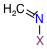

--------------------
NO-h
X=N-O-X
1 X u0 p0 c0 {2,D}
2 N u0 p1 c0 {1,D} {3,S}
3 O u0 p2 c0 {2,S} {4,S}
4 X u0 p0 c0 {3,S}



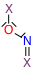

--------------------
OOH
X-O-OH
1 X u0 p0 c0 {2,S}
2 O u0 p2 c0 {1,S} {3,S}
3 O u0 p2 c0 {2,S} {4,S}
4 H u0 p0 c0 {3,S}



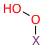

--------------------
N-CH3
X=N-CH3
1 X u0 p0 c0 {2,D}
2 N u0 p1 c0 {1,D} {3,S}
3 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}
6 H u0 p0 c0 {3,S}



--------------------
H2O
X:OH2
1 X u0 p0 c0
2 O u0 p2 c0 {3,S} {4,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}



ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".


--------------------
HC-C
X-CH=C=X


ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.ActionError('Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "{0}".'.format(self.radicalElectrons))
ActionError: Unable to update Atom due to LOSE_RADICAL action: Invalid radical electron set "-1".
ERROR:root:oops
Traceback (most recent call last):
  File "<ipython-input-147-67e2aa87e77c>", line 55, in <module>
    old_atom.decrementRadical()
  File "rmgpy/molecule/molecule.py", line 337, in rmgpy.molecule.molecule.Atom.decrementRadical
    def decrementRadical(self):
  File "rmgpy/molecule/molecule.py", line 346, in rmgpy.molecule.molecule.Atom.decrementRadical
    raise gr.Act

--------------------
HC-CH2
X-CH=CH2
--------------------
C-CH2
X=C=CH2
--------------------
C-CH3
X#C-CH3
1 X u0 p0 c0 {2,T}
2 C u0 p1 c0 {1,T} {3,S}
3 C u0 p0 c0 {2,S} {4,S} {5,S} {6,S}
4 H u0 p0 c0 {3,S}
5 H u0 p0 c0 {3,S}
6 H u0 p0 c0 {3,S}



--------------------
H2CN-h
X-CH2-N=X
1 X u0 p0 c0 {2,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 N u0 p1 c0 {2,S} {6,D}
6 X u0 p0 c0 {5,D}



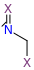

--------------------
47	sucesses out of 59
79.661% success rate


In [147]:
names_to_molecules = {}
error_molecules = {}
errors = 0
for name, structure in names_to_structure.items():
    print(name)
    print(names_to_structure[name])
    
    mol = Molecule()
    surface = Atom(element='X', lonePairs=0)
    mol.addAtom(surface)
    
    # for a single atom
    """
    atom = Atom(element='C')
    m.addAtom(atom)
    m.addBond(Bond(surface, atom, 1))"""
    
    m = re.match('X([:\-#=][XCHNO2-9]+)([:\-#=][XCHNO2-9]+)?([:\-#=][XCHNO2-9]+)?', structure)
    groups = m.groups()
    
    try:

        old_atom = surface
        for group in groups:
            if group is None: continue
            bond_type = group[0]
            group_atoms = group[1:]

            # for a group of atoms

            if group_atoms == 'X':
                group_mol = Molecule().fromAdjacencyList('1 X u0')
            else:
                group_mol = Molecule(SMILES='[{}]'.format(group_atoms))
            new_atom = group_mol.atoms[0]
            merged = mol.merge(group_mol)
            bond_order = {'-':1, ':':0, '=':2, '#':3}[bond_type]
            if bond_order >= 1:
                merged.addBond(Bond(old_atom, new_atom, bond_order))
            
            electrons = merged.getNumberOfRadicalElectrons()
                
            if bond_order > electrons:
                if new_atom.isCarbon():
                    if electrons == 2:
                        if not new_atom.isSurfaceSite():
                            new_atom.decrementRadical()
                        if not old_atom.isSurfaceSite():
                            old_atom.decrementRadical()
            elif bond_order <= electrons:
                for n in range(bond_order):
                        if not new_atom.isSurfaceSite():
                            new_atom.decrementRadical()
                        if not old_atom.isSurfaceSite():
                            old_atom.decrementRadical()

            mol = merged
            old_atom = new_atom

        names_to_molecules[name] = mol

        mol.multiplicity = mol.getNumberOfRadicalElectrons() + 1
        print(mol.toAdjacencyList())
        display(mol)
    except:
        logging.exception("oops")
        errors += 1
    print('-'*20)
print "{}\tsucesses out of {}\n{}% success rate".format(len(names_to_molecules)-errors, len(names_to_molecules), round(float(len(names_to_molecules)-errors)/len(names_to_molecules) * 100, 3))